In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('../input/soaicommunitydatathon23-stress-detection/train.csv')
test_data  = pd.read_csv('../input/soaicommunitydatathon23-stress-detection/test.csv')

train_data.head(5)

,post_id,subreddit,post_id.1,sentence_range,text,id,label,confidence,social_timestamp,social_karma,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,2092,stress,8b9j8h,"(0, 5)","Hello, You are invited to complete a survey fo...",6319,0,1.000000,1523381550,1,...,1.125,1.0000,1.0,1.70118,1.50569,1.86595,1.00,0,13.057706,-0.004167
1,1567,homeless,8cprrd,"(2, 7)","I want to know about your story, how you got t...",42996,0,0.800000,1523903160,1,...,1.125,1.1429,1.0,1.63593,1.42195,1.90234,1.00,3,4.984540,0.300000
2,1550,ptsd,63nmo1,"(5, 10)",Have any of you requested accommodations throu...,34744,0,1.000000,1491418808,7,...,1.400,1.2500,1.0,1.69333,1.34444,1.98548,0.89,10,5.223333,0.187500
3,2785,ptsd,9vkbbr,"[0, 5]","Whenever I have a reaction or meltdown, he alw...",614,1,0.571429,1541769275,3,...,1.000,1.1429,1.0,1.73122,1.48936,1.86938,0.81,2,5.156912,-0.060714
4,1936,relationships,7pdcp5,"(0, 5)",Throwaway because this is an embarrassing issu...,14399,1,0.800000,1515560629,1,...,1.000,1.1250,1.0,1.69282,1.49296,1.85947,0.60,5,4.097222,-0.245833


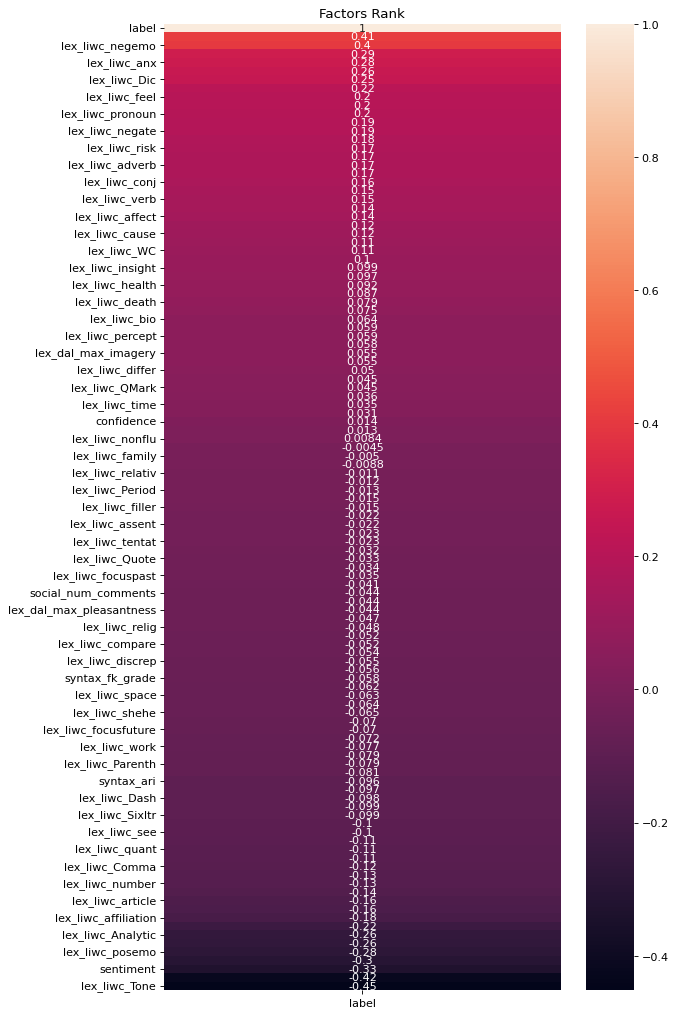

In [2]:
from matplotlib.pyplot import figure

figure(figsize=(8, 16), dpi=80)

sns.heatmap(train_data.corr()[['label']].sort_values(by='label', ascending=False), annot = True)
plt.title('Factors Rank')

plt.show()

In [3]:
train_x = pd.DataFrame(train_data,columns=['lex_liwc_Tone','sentiment','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_Dic'])
train_y = train_data.label

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf=clf.fit(train_x, train_y)

In [5]:
predictions2 = clf.predict(pd.DataFrame(test_data,columns=['lex_liwc_Tone','sentiment','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_Dic']))

In [6]:
sub_data2  = pd.read_csv('../input/soaicommunitydatathon23-stress-detection/sample.csv')

sub_data2['label'] = predictions2
sub_data2['post_id'] = test_data['post_id']
sub_data2.to_csv('submission3.csv',index=False)